MACHINE LEARNING PROJECT - PERFORMANCE COMPARISON FOR SVM, RANDOM FOREST AND KNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
df=pd.read_csv('heartdiseases.csv')

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


SVM

In [5]:
y=df['target'].values
x1=df.drop('target',axis=1)

In [7]:
#NORMALISATION
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values

In [8]:
#Split For Train and Test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [9]:
#SVM with Sklearn

from sklearn.svm import SVC

SVM = SVC(random_state=42)
start=time.time()
SVM.fit(xtrain,ytrain)  #learning 
end=time.time()
run_time=(end-start)*1000
#SVM Test 
print ("SVM Accuracy:", SVM.score(xtest,ytest))

SVMscore = SVM.score(xtest,ytest)

SVM Accuracy: 0.8051948051948052


C:\Users\AllenAlben\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
l=confusion_matrix(SVM.predict(xtest),ytest)

In [12]:
precision=(l[1][1]/(l[1][1] + l[0][1]))
recall=(l[1][1]/(l[1][0] + l[1][1]))
accuracy=((l[0][0]+l[1][1])/(l[0][0]+l[0][1]+l[1][0]+l[1][1]))
f1_score=2*((precision*recall)/(precision+recall))

In [13]:
print("Accuracy :",accuracy)
print('\n')
print("Precision :",precision)
print('\n')
print("Recall :",recall)
print('\n')
print("F1score :",f1_score)

print('\n')

print('Running time :',run_time)

Accuracy : 0.8051948051948052


Precision : 0.9194630872483222


Recall : 0.7405405405405405


F1score : 0.8203592814371257


Running time : 38.61546516418457


RANDOM FOREST

In [14]:
df=df.rename(columns={0: 'age', 1:'sex', 2:'cp', 3:'trestbps',4: 'chol',5: 'fbs',
6: 'restecg',7: 'thalach',8: 'exang',9: 'oldpeak',10: 'slope',11: 'ca',12: 'thal',13:'target'})

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
df.iloc[:,:-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2


In [17]:
x=df.drop('target',axis=1)
y=df['target']

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rtree=RandomForestClassifier(n_estimators=300,random_state=101)

In [21]:
rtree.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [22]:
#For cp number 3 = no pain, while 0-2 refers to pain, 
hence 3 will be grouped as disease -ve and 0-2 as disease +ve

In [23]:
number=[0,1,2]
for col in df.itertuples():
    if (col.cp in number):
        df['cp'].replace(to_replace=col.cp,value=1,inplace=True)

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,1,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,1,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,1,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,1,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,1,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
df_top9 = df.loc[:,['cp','oldpeak','thal','ca','thalach','age','chol','trestbps','exang']]

In [26]:
df_top9

,cp,oldpeak,thal,ca,thalach,age,chol,trestbps,exang
0,1,1.0,3,2,168,52,212,125,0
1,1,3.1,3,0,155,53,203,140,1
2,1,2.6,3,0,125,70,174,145,1
3,1,0.0,3,1,161,61,203,148,0
4,1,1.9,2,3,106,62,294,138,0
5,1,1.0,2,0,122,58,248,100,0
6,1,4.4,1,3,140,58,318,114,0
7,1,0.8,3,1,145,55,289,160,1
8,1,0.8,3,0,144,46,249,120,0
9,1,3.2,2,2,116,54,286,122,1


In [27]:
#With the inbuilt functions
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.metrics import precision_score

In [28]:
x_train,x_test,y_train,y_test = train_test_split(df_top9,y,test_size=0.4,random_state=101)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predictions=rfc.predict(x_test)
accuracy=accuracy_score(predictions,y_test)
cm=confusion_matrix(predictions,y_test)
prfs=precision_recall_fscore_support(predictions,y_test)

print('Accuracy :',accuracy)
print('\n')
print('Confusion_Matrix: ',cm)
print('\n')
print('Precision: ',prfs[0])
print('Recall: ',prfs[1])
print('Fscore: ',prfs[2])
print('Support: ',prfs[3])

Accuracy : 0.9414634146341463


Confusion_Matrix:  [[189  17]
 [  7 197]]


Precision:  [0.96428571 0.92056075]
Recall:  [0.91747573 0.96568627]
Fscore:  [0.94029851 0.94258373]
Support:  [206 204]


C:\Users\AllenAlben\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


KNN

In [29]:
df=pd.read_csv('heartdiseases.csv')

In [30]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [31]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
scaler.fit(df.drop('target',axis=1))

C:\Users\AllenAlben\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
scaled_features=scaler.transform(df.drop('target',axis=1))

C:\Users\AllenAlben\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [36]:
scaled_features

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [37]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [38]:
df_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X=df_feat
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=101)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn=KNeighborsClassifier(n_neighbors=1)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [44]:
pred=knn.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn import metrics

In [46]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[192   4]
 [  7 207]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       196
           1       0.98      0.97      0.97       214

   micro avg       0.97      0.97      0.97       410
   macro avg       0.97      0.97      0.97       410
weighted avg       0.97      0.97      0.97       410



In [47]:
error_rate=[]
 
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

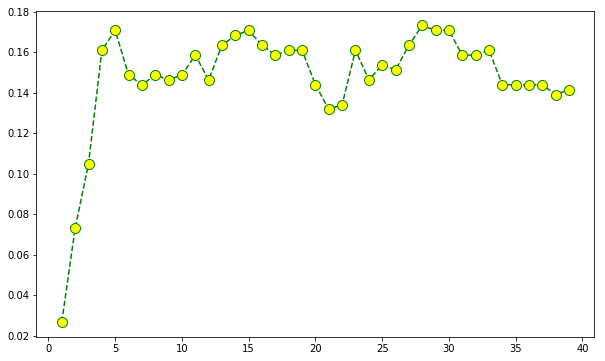

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green',
         linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)

In [49]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[192   4]
 [  7 207]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       196
           1       0.98      0.97      0.97       214

   micro avg       0.97      0.97      0.97       410
   macro avg       0.97      0.97      0.97       410
weighted avg       0.97      0.97      0.97       410



In [50]:
acc=metrics.accuracy_score(y_test,pred)
prec=precision_score(y_test,pred)

In [51]:
print("Accuracy :",acc)
print("Precision :",prec)

Accuracy : 0.973170731707317
Precision : 0.981042654028436


To conclude the accuracy for 
SVM: 80.51948%
RANDOM FOREST: 94.14634% 
KNN: 97.31707%

Hence we can conclude that KNN is the most accurate